## Python - Frame Evaluation Framework

In [1]:
# Install PT2.0 - stable
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/rocm5.4.2

Looking in indexes: https://download.pytorch.org/whl/rocm5.4.2
  Using cached https://download.pytorch.org/whl/rocm5.4.2/torch-2.0.1%2Brocm5.4.2-cp38-cp38-linux_x86_64.whl (1536.4 MB)
  Using cached https://download.pytorch.org/whl/pytorch_triton_rocm-2.0.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (78.3 MB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 MB 4.6 MB/s eta 0:00:00:00:0100:01
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
  Using cached https://download.pytorch.org/whl/rocm5.4.2/torchaudio-2.0.2%2Brocm5.4.2-cp38-cp38-linux_x86_64.whl (4.1 MB)
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.16.0.dev20230817+rocm5.6
    Uninstalling torchvision-0.16.0.dev20230817+rocm5.6:
 

### 01 - CPython interpreter & Python bytecode
Python built-in module `dis` (diassembler) can be used to output the bytecode for python functions

The bytecode will show:
- The line number of the source code that corresponds to to the byte code
- List of instructions the CPython interpreter will execute
- Instruction pointers (0,2,4,6) indicate the position of each bytecode instruction in the bytecode sequence (to cover jumps)
- Index of local variable

In [2]:
#Foo-style function
def foo(x, y):
    return x + y

import dis
dis.dis(foo)

  3           0 LOAD_FAST                0 (x)
              2 LOAD_FAST                1 (y)
              4 BINARY_ADD
              6 RETURN_VALUE


We can also compile the function down to Python bytecode
- def compile(source, filename, mode, flags=0, dont_inherit=False, optimize=-1)

In [6]:
source = """
def foo_compile(x=5, y=7):
    return x + y
"""

# filename: '<string>' to denote code string but could be file made
# mode: 'exec', 'eval' 'single'
code_object = compile(source, '<string>', 'exec')

# Run the bytecode in cpython - this example it defines the function
exec(code_object)
dis.dis(code_object)

result = foo_compile(3, 4)
print(result)


  2           0 LOAD_CONST               5 ((5, 7))
              2 LOAD_CONST               2 (<code object foo_compile at 0x7f3438529f50, file "<string>", line 2>)
              4 LOAD_CONST               3 ('foo_compile')
              6 MAKE_FUNCTION            1 (defaults)
              8 STORE_NAME               0 (foo_compile)
             10 LOAD_CONST               4 (None)
             12 RETURN_VALUE

Disassembly of <code object foo_compile at 0x7f3438529f50, file "<string>", line 2>:
  3           0 LOAD_FAST                0 (x)
              2 LOAD_FAST                1 (y)
              4 BINARY_ADD
              6 RETURN_VALUE
7


In [7]:
import inspect

def foo_compile(x=5, y=7):
    result = x + y
    frame = inspect.currentframe()
    return result, frame

result, pyt_frame = foo_compile(3, 4)

dis.dis(foo_compile)

  4           0 LOAD_FAST                0 (x)
              2 LOAD_FAST                1 (y)
              4 BINARY_ADD
              6 STORE_FAST               2 (result)

  5           8 LOAD_GLOBAL              0 (inspect)
             10 LOAD_METHOD              1 (currentframe)
             12 CALL_METHOD              0
             14 STORE_FAST               3 (frame)

  6          16 LOAD_FAST                2 (result)
             18 LOAD_FAST                3 (frame)
             20 BUILD_TUPLE              2
             22 RETURN_VALUE


In [12]:
# PyFrameObject
print(type(pyt_frame))

#print("All attributes of frame")
#print(pyt_frame.__dir__())

print("Code object:", pyt_frame.f_code)
print("Local variables:", pyt_frame.f_locals)
print("Global variables:", pyt_frame.f_globals)
print("Value of x:", pyt_frame.f_locals['x'])
print("Back pointer to the previous frame:", pyt_frame.f_back)
print("Current line number in Python code:", pyt_frame.f_lineno)

<class 'frame'>
Code object: <code object foo_compile at 0x7f3438529c90, file "/tmp/ipykernel_232813/58056854.py", line 3>
Local variables: {'x': 3, 'y': 4, 'result': 7, 'frame': <frame at 0x7f3438533550, file '/tmp/ipykernel_232813/58056854.py', line 6, code foo_compile>}
Global variables: {'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "# Install PT2.0\nget_ipython().system('pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/rocm5.4.2')", '#Foo-style function\ndef foo(x, y):\n    return x + y\n\nimport dis\ndis.dis(foo)', 'source = """\ndef foo_compile(x=5, y=7):\n    return x + y\n"""\n\n# filename: \'<string>\' to denote code string but could be file made\n# mode: \'exec\', \'eval\' \'single\'\nbytecode = compile(source, \'<stri

In [13]:
#PyCodeObject
code_obj = pyt_frame.f_code

print(type(code_obj))
print(code_obj.__dir__())

print("========================")
print("Actual bytecode as a bytes object")
print(code_obj.co_code)
print("Constants used in the bytecode")
print(code_obj.co_consts)
print("Names of the variables and functions")
print(code_obj.co_names)
print("Names of the local variables")
print(code_obj.co_varnames)
print("Number of args")
print(code_obj.co_argcount)

<class 'code'>
['__repr__', '__hash__', '__getattribute__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__new__', '__sizeof__', 'replace', 'co_argcount', 'co_posonlyargcount', 'co_kwonlyargcount', 'co_nlocals', 'co_stacksize', 'co_flags', 'co_code', 'co_consts', 'co_names', 'co_varnames', 'co_freevars', 'co_cellvars', 'co_filename', 'co_name', 'co_firstlineno', 'co_lnotab', '__doc__', '__str__', '__setattr__', '__delattr__', '__init__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__dir__', '__class__']
Actual bytecode as a bytes object
b'|\x00|\x01\x17\x00}\x02t\x00\xa0\x01\xa1\x00}\x03|\x02|\x03f\x02S\x00'
Constants used in the bytecode
(None,)
Names of the variables and functions
('inspect', 'currentframe')
Names of the local variables
('x', 'y', 'result', 'frame')
Number of args
2


### 02 - Frame Evaluation API https://peps.python.org/pep-0523/
Instead of sending bytecode to interpreter it can be passed to any callback which could modify the bytecode and pass to the interpreter - which is what TorchDynamo does :)

### 03 - TorchDynamo
https://pytorch.org/get-started/pytorch-2.0/

Python:
- Foo is a function call
- This function call becomes a python frame object - each entry of a stack trace essentially
- In each PyFrameObject lives a PyCodeObject which says which the files the functions are from, the constants/local variables
- _PyEval_EvalFrameDefault() - Takes a frame and evalutes it with the interpreter
- (31:44)

Dynamo:
- Uses the same foo function call, the same PyFrameObject and PyCodeObject
- It extracts the torch components of the bytecode and produces several outputs
       - It produces the FX Graph
       - It produces a compiled function from a user-defined compiler using the lowered FX graph as input
       - And it transforms the PyCodeObject bytecode and patches back into the Frame
       - Along the way we accumulate guards to avoid excessive recompilation
  
  
![Image](https://pytorch.org/docs/stable/_images/TorchDynamo.png)

### 03a - TorchDynamo - FX Graph
TorchDynamo intercepts the execution of Python codes (PyFrameObject), transforms them into an FX intermediate representation (IR) and stores them in a special structure called an FX Graph

In reality FX graphs are essentially containers for some IR

In [26]:
import torch
from typing import List
import logging
from torch import _dynamo

torch._dynamo.config.log_level = False #logging.INFO
torch._dynamo.config.output_code = False

def my_compiler(gm: torch.fx.GraphModule, example_inputs= List[torch.Tensor]):
    code = gm.print_readable()
    gm.graph.print_tabular()
    return gm.forward

def toy_example(x, y):
    a = x * y
    b = a * y
    return a + b

compiled_fn = torch.compile(toy_example, backend=my_compiler)

compiled_fn(torch.randn(5), torch.randn(5))


class GraphModule(torch.nn.Module):
    def forward(self, x : torch.Tensor, y : torch.Tensor):
        # File: /tmp/ipykernel_232813/2934430678.py:15, code: a = x * y
        mul = x * y;  x = None
        
        # File: /tmp/ipykernel_232813/2934430678.py:16, code: b = a * y
        mul_1 = mul * y;  y = None
        
        # File: /tmp/ipykernel_232813/2934430678.py:17, code: return a + b
        add = mul + mul_1;  mul = mul_1 = None
        return (add,)
        
opcode         name    target                   args          kwargs
-------------  ------  -----------------------  ------------  --------
placeholder    x       x                        ()            {}
placeholder    y       y                        ()            {}
call_function  mul     <built-in function mul>  (x, y)        {}
call_function  mul_1   <built-in function mul>  (mul, y)      {}
call_function  add     <built-in function add>  (mul, mul_1)  {}
output         output  output                   ((add,),)  

/opt/conda/envs/py_3.8/lib/python3.8/site-packages/torch/_dynamo/eval_frame.py:279: UserWarning: changing options to `torch.compile()` may require calling `torch._dynamo.reset()` to take effect
  warnings.warn(


tensor([-0.0706, -0.0674, -0.4773, -0.1619, -2.3563])

In [30]:
import torch
from typing import List
import logging
from torch import _dynamo

torch._dynamo.config.log_level = False
torch._dynamo.config.output_code = False

def my_compiler(gm: torch.fx.GraphModule, example_inputs= List[torch.Tensor]):
    code = gm.print_readable()
    gm.graph.print_tabular()
    return gm.forward

def toy_example(x, y):
    a = x * y
    print("break!")
    b = a * y
    torch._dynamo.graph_break()
    return a + b

compiled_fn = torch.compile(toy_example, backend=my_compiler)

compiled_fn(torch.randn(5), torch.randn(5))


/opt/conda/envs/py_3.8/lib/python3.8/site-packages/torch/_dynamo/eval_frame.py:279: UserWarning: changing options to `torch.compile()` may require calling `torch._dynamo.reset()` to take effect
  warnings.warn(
[2023-08-18 12:43:10,239] torch._dynamo.symbolic_convert: [INFO] Step 1: torchdynamo start tracing toy_example
[2023-08-18 12:43:10,240] torch._dynamo.symbolic_convert: [DEBUG] TRACE starts_line /tmp/ipykernel_232813/2571593824.py:15
[2023-08-18 12:43:10,241] torch._dynamo.symbolic_convert: [DEBUG] TRACE LOAD_FAST x []
[2023-08-18 12:43:10,242] torch._dynamo.symbolic_convert: [DEBUG] TRACE LOAD_FAST y [TensorVariable()]
[2023-08-18 12:43:10,243] torch._dynamo.symbolic_convert: [DEBUG] TRACE BINARY_MULTIPLY None [TensorVariable(), TensorVariable()]
[2023-08-18 12:43:10,246] torch._dynamo.symbolic_convert: [DEBUG] TRACE STORE_FAST a [TensorVariable()]
[2023-08-18 12:43:10,247] torch._dynamo.symbolic_convert: [DEBUG] TRACE starts_line /tmp/ipykernel_232813/2571593824.py:16
[2023-08

class GraphModule(torch.nn.Module):
    def forward(self, x : torch.Tensor, y : torch.Tensor):
        # File: /tmp/ipykernel_232813/2571593824.py:15, code: a = x * y
        mul = x * y;  x = y = None
        return (mul,)
        
opcode         name    target                   args       kwargs
-------------  ------  -----------------------  ---------  --------
placeholder    x       x                        ()         {}
placeholder    y       y                        ()         {}
call_function  mul     <built-in function mul>  (x, y)     {}
output         output  output                   ((mul,),)  {}
break!
class GraphModule(torch.nn.Module):
    def forward(self, y : torch.Tensor, a : torch.Tensor):
        # File: /tmp/ipykernel_232813/2571593824.py:17, code: b = a * y
        mul = a * y;  a = y = None
        return (mul,)
        
opcode         name    target                   args       kwargs
-------------  ------  -----------------------  ---------  --------
placeholder

tensor([-2.4914e-02, -1.2275e+00,  1.2223e+01,  7.6648e-03, -5.1721e-01])

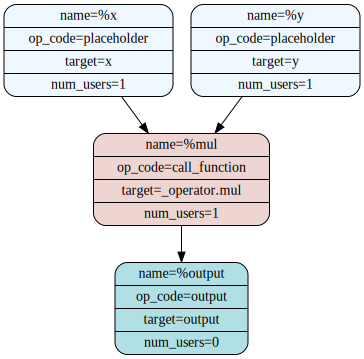

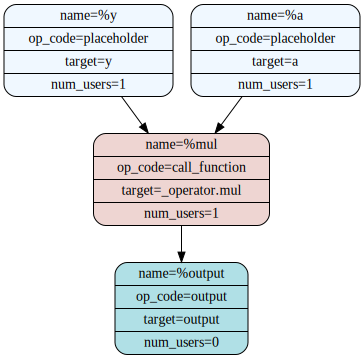

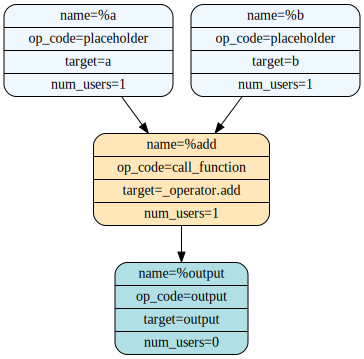

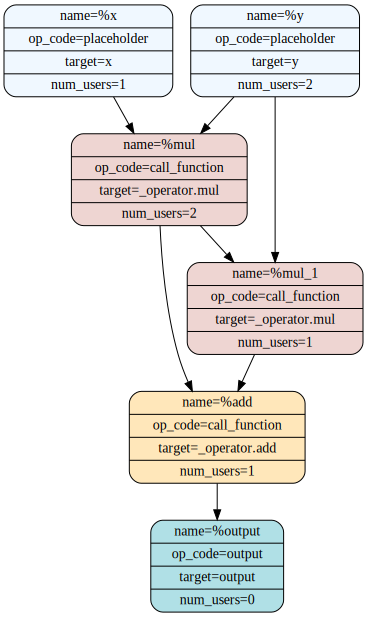

In [34]:
from IPython.display import SVG

# Display the SVG image
display(SVG(filename='graph_a.svg'))
display(SVG(filename='graph_b.svg'))
display(SVG(filename='graph_c.svg'))

display(SVG(filename="forward.svg"))

### AOT/IR

In [13]:
import torch.nn as nn
import torch._dynamo

### Simple module:

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32, 64)
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.nn.functional.gelu(x)
        return x
    
model = MLP()
bs = 8
input = torch.randn(bs, 32)

### Custom compiler
def toy_compiler(gm, sample_inputs):
    print("Dynamo produced an fx Graph in Torch IR:")
    gm.print_readable()
    print(sample_inputs)
    return gm.forward

torch._dynamo.reset()
fn = torch.compile(backend=toy_compiler, dynamic=True)(model)

# Trigger compilation on forwards on first run
out = fn(input)

Dynamo produced an fx Graph in Torch IR:
class GraphModule(torch.nn.Module):
    def forward(self, s0 : torch.SymInt, L_x_ : torch.Tensor):
        l_x_ = L_x_
        
        # File: /tmp/ipykernel_395751/2829938787.py:12, code: x = self.fc1(x)
        l__self___fc1 = self.L__self___fc1(l_x_);  l_x_ = None
        
        # File: /tmp/ipykernel_395751/2829938787.py:13, code: x = torch.nn.functional.gelu(x)
        gelu = torch._C._nn.gelu(l__self___fc1);  l__self___fc1 = None
        return (gelu,)
        
[s0, tensor([[-2.0535, -0.6647, -0.0672, -0.7256,  1.2605, -0.3283, -0.5183,  0.3574,
         -0.0907,  0.0303, -1.2413, -0.3939, -1.2627, -0.0352, -0.2364, -1.1007,
         -0.0522,  0.5258,  0.7490,  0.7043,  0.8335,  0.0896,  2.1802,  0.0320,
          0.5655, -1.2451, -0.8018, -0.7264, -0.3776, -0.0621, -1.3117, -1.4410],
        [-0.7965, -1.0759, -0.0176,  0.1857, -1.3831, -0.5108, -0.2139, -1.6573,
          0.5811,  1.1196, -0.8478,  1.3801, -0.6072,  0.4214, -0.0224, -

In [28]:
# Invoke AOTAutograd
# - Captures fwd/bwd graph
# - Required for training
# - Lower from torch level are to ATen IR

from torch._functorch.aot_autograd import aot_module_simplified

def new_backend(gm, sample_inputs):
    def my_compiler(gm, sample_inputs):
        print("AOTAutograd produced and fx graph in ATen IR")
        gm.print_readable()
        print(sample_inputs)
        return gm.forward
    
    return aot_module_simplified(
        gm, 
        sample_inputs,
        fw_compiler=my_compiler
    )

torch._dynamo.reset()

# new bakcned invokes aot_autograd explicitly
fn = torch.compile(backend=new_backend, dynamic=True)(model)

out = fn(input)
out.sum().backward()

AOTAutograd produced and fx graph in ATen IR
class GraphModule(torch.nn.Module):
    def forward(self, primals_1: f32[64, 32], primals_2: f32[64], primals_3: Sym(s0), primals_4: f32[s0, 32]):
        # File: /tmp/ipykernel_395751/2829938787.py:12, code: x = self.fc1(x)
        t: f32[32, 64] = torch.ops.aten.t.default(primals_1);  primals_1 = None
        addmm: f32[s0, 64] = torch.ops.aten.addmm.default(primals_2, primals_4, t);  primals_2 = t = None
        
        # File: /tmp/ipykernel_395751/2829938787.py:13, code: x = torch.nn.functional.gelu(x)
        gelu: f32[s0, 64] = torch.ops.aten.gelu.default(addmm)
        return [gelu, primals_4, addmm, primals_3]
        
[Parameter(FakeTensor(..., size=(64, 32), requires_grad=True)), Parameter(FakeTensor(..., size=(64,), requires_grad=True)), s0, FakeTensor(..., size=(s0, 32))]
AOTAutograd produced and fx graph in ATen IR
class GraphModule(torch.nn.Module):
    def forward(self, primals_3: Sym(s0), primals_4: f32[s0, 32], addmm: f32[

/opt/conda/envs/py_3.8/lib/python3.8/site-packages/torch/_functorch/aot_autograd.py:1510: UserWarning: Your compiler for AOTAutograd is returning a function that doesn't take boxed arguments. Please wrap it with functorch.compile.make_boxed_func or handle the boxed arguments yourself. See https://github.com/pytorch/pytorch/pull/83137#issuecomment-1211320670 for rationale.
  warnings.warn(


In [44]:
# PrimTorch example
from torch._inductor.decomposition import decompositions as default_decompositions
print(default_decompositions)

def fn(a, b):
    return a + b

prims_decomp = torch._inductor.decomposition.get_decompositions([
    torch.ops.aten.add,
    torch.ops.aten.expand.default,
])

print(prims_decomp)

{<OpOverload(op='aten.addcdiv', overload='default')>: <function addcdiv at 0x7f2a254f01f0>, <OpOverload(op='aten.addcdiv', overload='out')>: <function addcdiv at 0x7f2a254f01f0>, <OpOverload(op='aten.addcdiv_', overload='default')>: <function addcdiv at 0x7f2a254dd670>, <OpOverload(op='aten.addcmul', overload='default')>: <function addcmul at 0x7f2a254f03a0>, <OpOverload(op='aten.addcmul', overload='out')>: <function addcmul at 0x7f2a254f03a0>, <OpOverload(op='aten.addcmul_', overload='default')>: <function addcmul at 0x7f2a254dd5e0>, <OpOverload(op='aten.addr', overload='default')>: <function addr at 0x7f2a254fee50>, <OpOverload(op='aten.addr', overload='out')>: <function addr at 0x7f2a254fee50>, <OpOverload(op='aten.affine_grid_generator', overload='default')>: <function affine_grid_generator at 0x7f2a25695940>, <OpOverload(op='aten.affine_grid_generator', overload='out')>: <function affine_grid_generator at 0x7f2a25695940>, <OpOverload(op='aten.aminmax', overload='default')>: <funct

### New logging  api
print(de)

In [1]:
# Updated logging api
import torch._logging 
torch._logging.set_logs(dynamo = logging.DEBUG,
                        dynamic = logging.DEBUG,
                        output_code=True,
                        guards=True,
                        bytecode=True,
                        graph=True,
                        graph_code=True,
                        aot_graphs=True,
                        aot_joint_graphs=True,
                        aot=logging.DEBUG,
                        graph_sizes=True,
                        aot_joint_graph=True,
                        recompiles=True,
                        graph_breaks=True,
                        not_implemented=True,
                        schedule=True,
                        perf_hints=True)

Cloning into 'pytorch-micro-benchmarking'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 141 (delta 9), reused 9 (delta 4), pack-reused 117
Receiving objects: 100% (141/141), 52.72 KiB | 199.00 KiB/s, done.
Resolving deltas: 100% (74/74), done.


### Inductor

In [4]:
import torch.nn as nn
import torch._dynamo
import logging
torch._logging.set_logs(dynamo = logging.DEBUG,
                        dynamic = logging.DEBUG,
                        inductor = logging.DEBUG,
                        output_code=True,
                        guards=True,
                        bytecode=True,
                        graph=True,
                        graph_code=True,
                        aot_graphs=True,
                        aot_joint_graph=True,
                        aot=logging.DEBUG,
                        graph_sizes=True,
                        recompiles=True,
                        graph_breaks=True,
                        schedule=True,
                        perf_hints=True)

### Simple module:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32, 64)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.nn.functional.gelu(x)
        return x

model = MLP()
bs = 8
input = torch.randn(bs, 32, device="cuda")
model.to("cuda")

# Trigger compilation on forwards on first run
with torch.profiler.profile() as prof: 
    fn = torch.compile(backend='inductor')(model)
    out = fn(input)
    out.sum().backward

prof.export_chrome_trace("MLP_inductor.json")

STAGE:2023-08-18 08:59:44 223465:223465 ActivityProfilerController.cpp:312] Completed Stage: Warm Up
[2023-08-18 08:59:44,886] torch._dynamo.symbolic_convert: [INFO] Step 1: torchdynamo start tracing forward /tmp/ipykernel_223465/2649045773.py:27
[2023-08-18 08:59:44,888] torch.fx.experimental.symbolic_shapes: [INFO] 2.0: create_env
[2023-08-18 08:59:44,891] torch._dynamo.symbolic_convert.__trace_source: [DEBUG] TRACE starts_line forward /tmp/ipykernel_223465/2649045773.py:27
[2023-08-18 08:59:44,891] torch._dynamo.symbolic_convert.__trace_source: [DEBUG]         def forward(self, x):
[2023-08-18 08:59:44,893] torch._dynamo.variables.builder: [DEBUG] wrap_to_fake L['x'] (8, 32) [<DimDynamic.STATIC: 2>, <DimDynamic.STATIC: 2>] [None, None]
[2023-08-18 08:59:44,896] torch._dynamo.symbolic_convert.__trace_source: [DEBUG] TRACE starts_line forward /tmp/ipykernel_223465/2649045773.py:28
[2023-08-18 08:59:44,896] torch._dynamo.symbolic_convert.__trace_source: [DEBUG]             x = self.fc1

[2023-08-18 08:59:45,084] torch.fx.experimental.symbolic_shapes: [DEBUG] 2.0: eval True [trivial]
[2023-08-18 08:59:45,095] torch._inductor.graph: [DEBUG] Force channels last inputs for 0 conv for the current graph with id 2
[2023-08-18 08:59:45,105] torch._inductor.scheduler: [INFO] Number of scheduler nodes after fusion 2
[2023-08-18 08:59:45,106] torch._inductor.codegen.triton.__schedule: [DEBUG] Schedule:
[2023-08-18 08:59:45,106] torch._inductor.codegen.triton.__schedule: [DEBUG]  [SchedulerNode(name='buf1')]
[2023-08-18 08:59:45,116] torch._inductor.graph.__output_code: [INFO] Output code written to: /tmp/torchinductor_jenkins/d6/cd6j3be5un2dpthxmoeoe2i425odk3oxaryh753rzoxyzvzvxdj2.py
[2023-08-18 08:59:45,117] torch._inductor.graph: [DEBUG] Output code written to: /tmp/torchinductor_jenkins/d6/cd6j3be5un2dpthxmoeoe2i425odk3oxaryh753rzoxyzvzvxdj2.py
[2023-08-18 08:59:45,118] torch._inductor.graph.__output_code: [DEBUG] Output code: 
[2023-08-18 08:59:45,118] torch._inductor.graph.